##  *Statistics coded:* Quarterly national accounts - GDP and employment

Prepared by [**Hatem Alharazin**](hatemjamil.89@gmail.com) (EMOS).

This notebook aims at illustrating the Statistics Explained article on [Quarterly national accounts](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Quarterly_national_accounts_-_GDP_and_employment#Data_sources).

## Setting Packages up

In [28]:
library(ggplot2)
library(tseries)
library(readxl)
#library(tidyr)
#library(dplyr)
#library(plotly)

## GDP and Employment growth rate

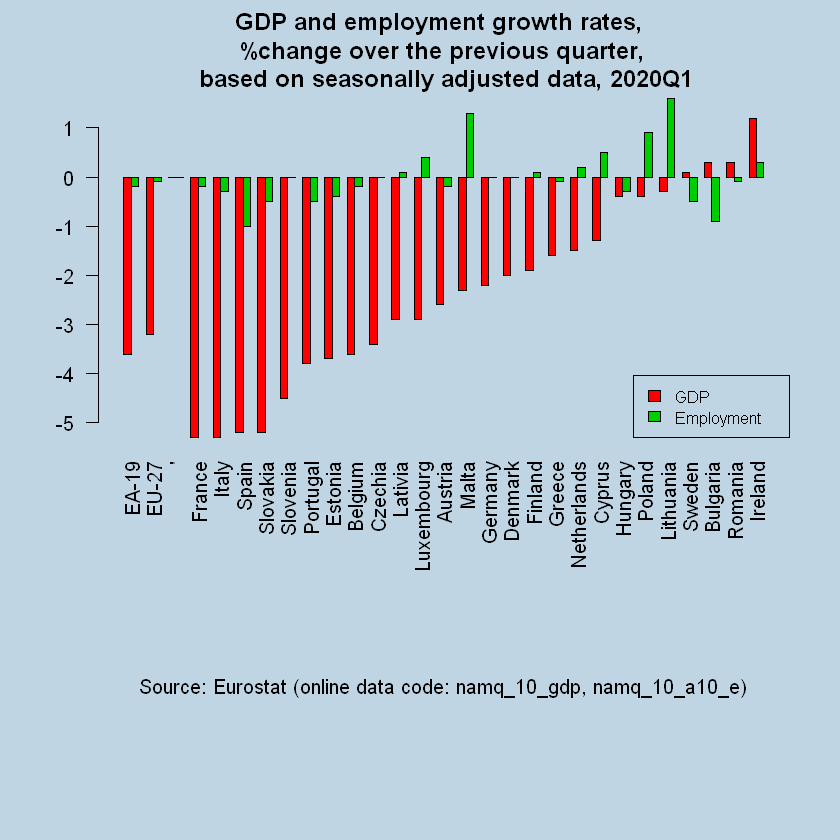

In [77]:
GR_Data <- read_excel("~/Eurostatdataset/GDP_Emp.xlsx", 
    sheet = "Sheet3")
GR_Data <- as.matrix(GR_Data[,2:ncol(GR_Data)])
nf <- layout(matrix(c(1,2),ncol=1, byrow=TRUE), widths=c(6,6), heights=c(2,1))
par(bg = '#BFD5E3')
#par(pin=c(6,2.5))
barplot(GR_Data, las = 2, beside = T, col = c(2,3), main = "GDP and employment growth rates, \n %change over the previous quarter, \n based on seasonally adjusted data, 2020Q1")
legend("bottomright", legend =c("GDP","Employment"), fill = c(2,3), box.lty = 1, cex = 0.8)

plot(c(0, 1), c(0, 1), ann = F, bty = 'n', type = 'n', xaxt = 'n', yaxt = 'n')
text(x = 0.5, y = 0.5, paste("Source: Eurostat (online data code: namq_10_gdp, namq_10_a10_e)"), cex = 1, col = "black", adj=0.5)


#Growth_rate_data <- read.csv("~/Eurostatdataset/GDP_Emp.csv")
#p <- ggplot(data=Growth_rate_data, aes(x=name, y=value, fill=Indicator)) +
#geom_bar(stat="identity", color="black", position=position_dodge())+
#  theme_minimal()
#p + theme(axis.text.x = element_text(angle = 90))


# Quarterly GDP growth


In [24]:
# Read the data from csv files
GDP_EU27_EA19 <- read.csv("~/Eurostatdataset/namq_10_gdp_1_Data.csv") # GDP of EU27 and EA19 2007Q4-2020Q2
GDP_Unit_Stat <- read.csv("~/Eurostatdataset/naidq_10_gdp_1_Data.csv")# GDP of United States 2007Q4-2020Q2
GDP_df <- data.frame(GDP_EU27_EA19[,-1], GDP_Unit_Stat)               # Merge GDP files in a data frame
GDP_TS <- ts(GDP_df[,-3], start = c(2007, 4), frequency = 4)          # Define data as time series
GDP_Growth_Rate <- ((GDP_TS-lag(GDP_TS,-1))/lag(GDP_TS,-1))*100       # Calculate the quarterly growth rate
colnames(GDP_Growth_Rate) <- c("EU27","EA19","United States")         # change the names

#par(bg = 'gray')
#plot(GDP_Growth_Rate[,1], ylim=c(-4,2))
#lines(GDP_Growth_Rate[,2], col=2)
#lines(GDP_Growth_Rate[,3], col=4)

Date_var <- seq(as.Date("2008/1/1"), as.Date("2020/6/1"), by = "quarter")
GDP_Growth_Rate <- data.frame(GDP_Growth_Rate,Date_var)
#GDP_Growth_Rate

In [13]:
Stacked_data <- data.frame(GDP_Growth_Rate[4], stack(GDP_Growth_Rate[1:3]))

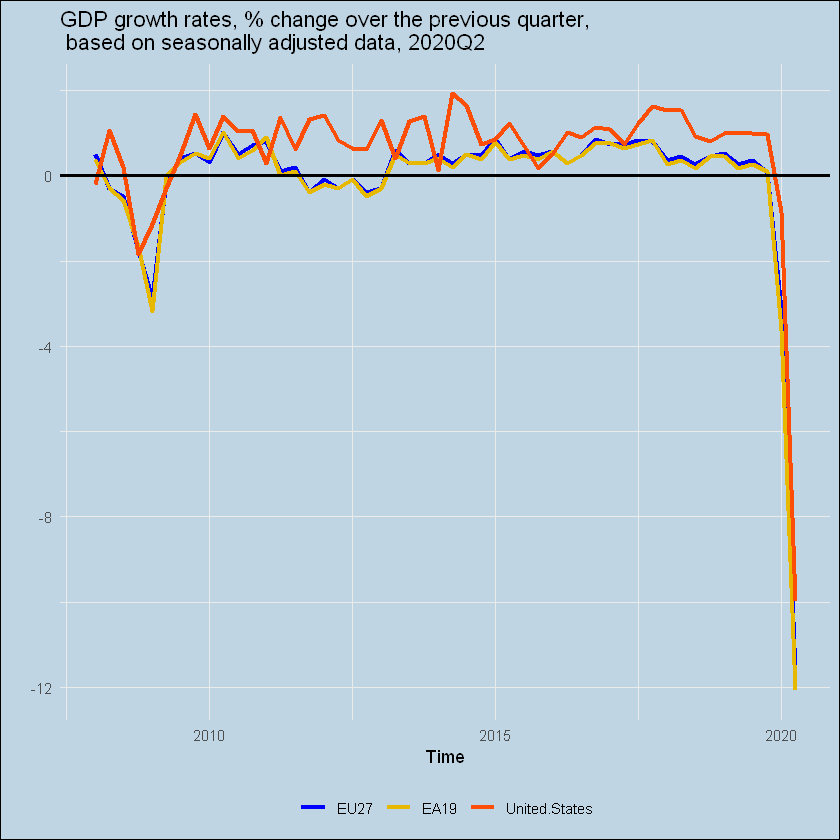

In [62]:
# Multiple line plot
p <- ggplot(Stacked_data, aes(x = Date_var, y = values)) + 
  geom_line(aes(color = ind), size = 1.3) +
  scale_color_manual(values = c("blue", "#E7B800", "#FC4E07")) +
  theme_minimal()
p <- p + theme(legend.position="bottom")+ 
         theme(legend.title = element_blank())

# Add horizontal line at y = 0
p <- p + geom_hline(yintercept=0, color = "black", size=1)
p <- p + theme(plot.background = element_rect(fill = "#BFD5E3"))

p + ggtitle("GDP growth rates, % change over the previous quarter,\n based on seasonally adjusted data, 2020Q2") +
  xlab("Time") + ylab(" ")

Don't forget to explain what you are doing...

# GDP growth by Member State

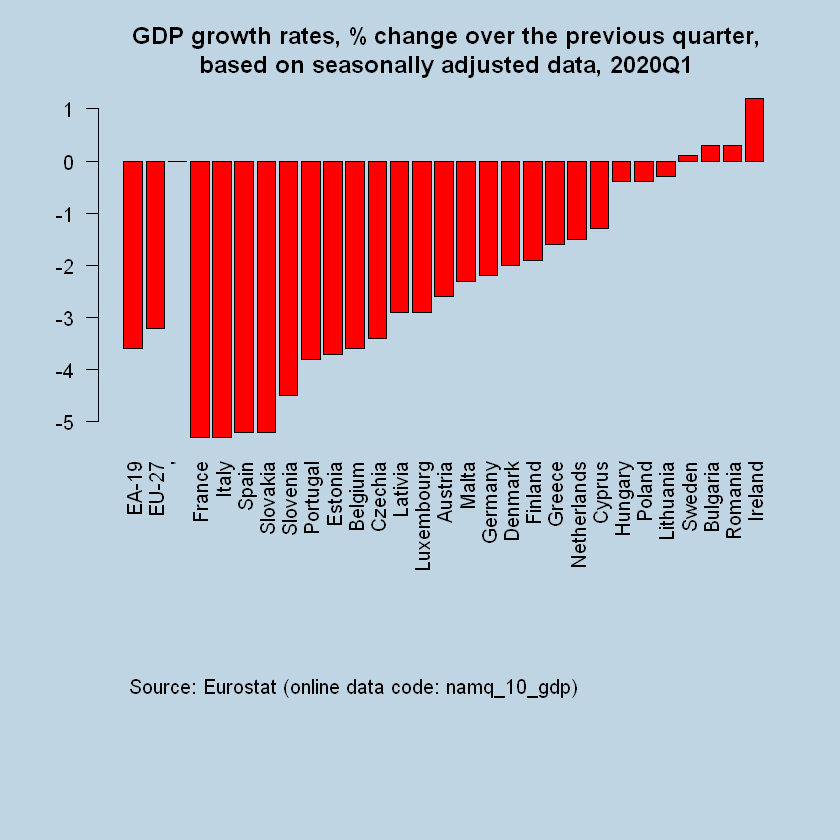

In [74]:
library(magick)
# logo <- image_read("https://ec.europa.eu/eurostat/statistics-explained/images/0/09/Logo_RGB-POS.png")
GR_Data_GDP <- as.matrix(GR_Data[1,1:ncol(GR_Data)])
par(bg = '#BFD5E3')
nf <- layout(matrix(c(1,2),ncol=1, byrow=TRUE), widths=c(6,6), heights=c(2,1))
#par(pin=c(6,3))
barplot(t(GR_Data_GDP), las = 2, col = 2, main = " GDP growth rates, % change over the previous quarter,\n based on seasonally adjusted data, 2020Q1")
plot(c(0, 1), c(0, 1), ann = F, bty = 'n', type = 'n', xaxt = 'n', yaxt = 'n')
text(x = 0.5, y = 0.5, paste("Source: Eurostat (online data code: namq_10_gdp)"), cex = 1, col = "black", adj=0.7)


# GDP components and contributions to growth

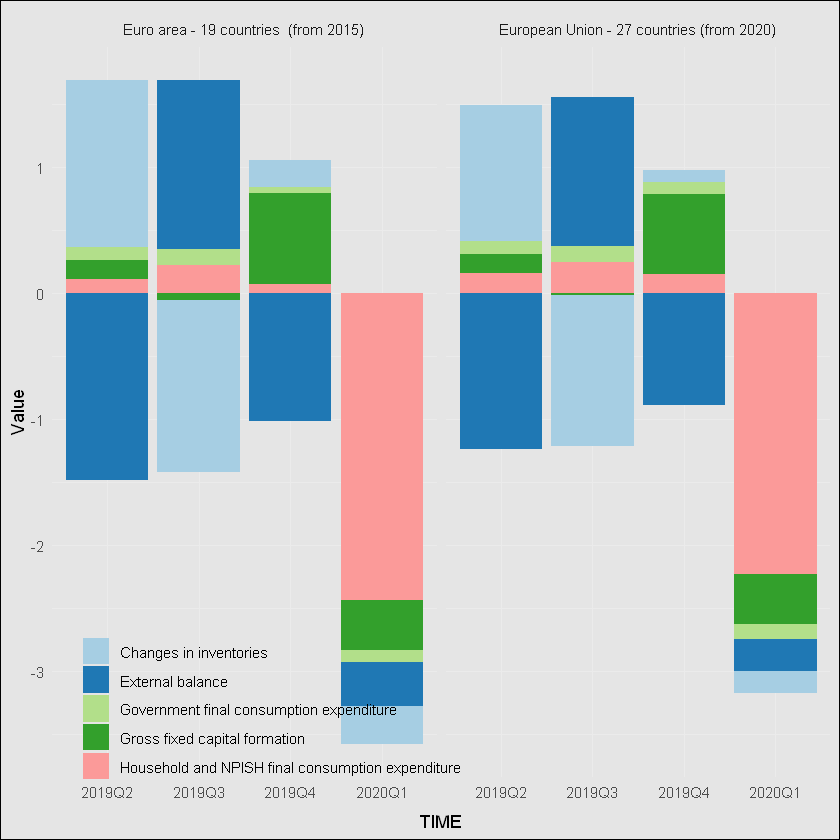

In [59]:
GDP_comp <- read.csv("~/Eurostatdataset/Figure 3/namq_10_gdp_1_Data.csv") # EMP of EU27 and EA19 2007Q4-2020Q2

GDP_GR <- GDP_comp[which(GDP_comp$NA_ITEM == "Gross domestic product at market prices"), ]
GDP_comp_EU27 <- GDP_comp[which(GDP_comp$NA_ITEM != "Gross domestic product at market prices"), ]

p <- ggplot(data=GDP_comp_EU27, aes(x=TIME, y=Value, fill=NA_ITEM)) +
  geom_bar(stat="identity")+
  scale_fill_brewer(palette="Paired")+
  theme_minimal()
p <- p + theme(legend.position=c(0.3, 0.1))+ 
         theme(legend.title = element_blank())
p <- p + facet_grid(. ~ GEO)

#p <- p + geom_hline(yintercept=0, color = "black", size=1)
p + theme(plot.background = element_rect(fill = "gray90"))

# Quarterly employment growth

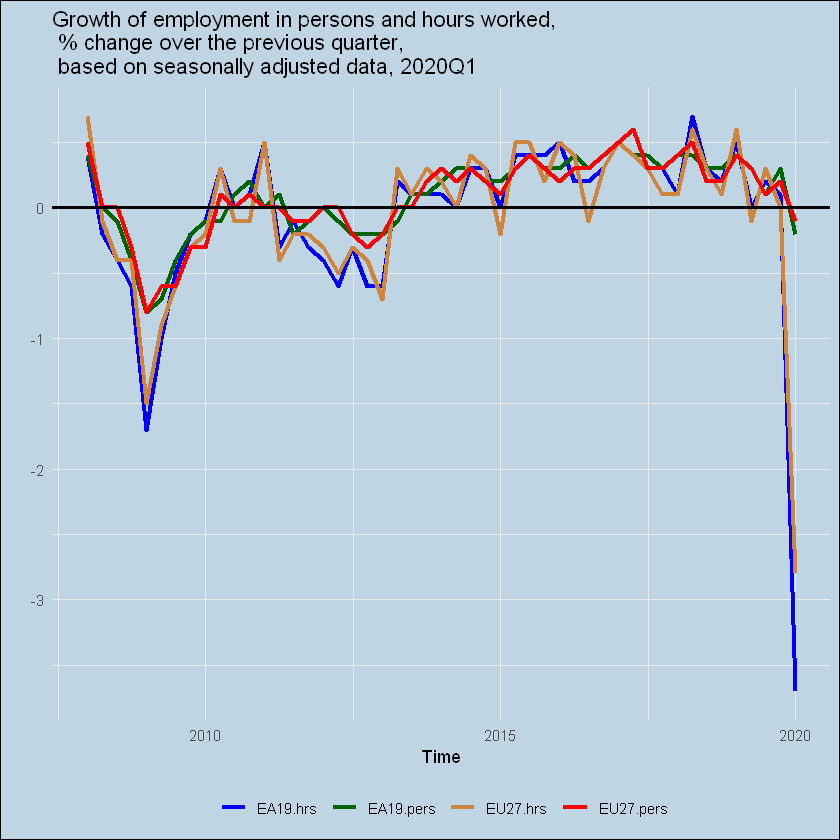

In [35]:
EMP_EU27_EA19 <- read.csv("~/Eurostatdataset/namq_10_a10_e_1_Data.csv") # EMP of EU27 and EA19 2007Q4-2020Q2
EMP_EU27_EA19$Series[EMP_EU27_EA19$GEO == "European Union - 27 countries (from 2020)" & EMP_EU27_EA19$UNIT == "Percentage change on previous period (based on persons)"] <- "EU27 pers"
EMP_EU27_EA19$Series[EMP_EU27_EA19$GEO == "European Union - 27 countries (from 2020)" & EMP_EU27_EA19$UNIT == "Percentage change on previous period (based on hours worked)"] <- "EU27 hrs"
EMP_EU27_EA19$Series[EMP_EU27_EA19$GEO == "Euro area - 19 countries  (from 2015)" & EMP_EU27_EA19$UNIT == "Percentage change on previous period (based on persons)"] <- "EA19 pers"
EMP_EU27_EA19$Series[EMP_EU27_EA19$GEO == "Euro area - 19 countries  (from 2015)" & EMP_EU27_EA19$UNIT == "Percentage change on previous period (based on hours worked)"] <- "EA19 hrs"
EMP_EU27_EA19 <- EMP_EU27_EA19[,-c(2,3)]
unstacked_data <- data.frame(unstack(EMP_EU27_EA19[,c(2,3)]))
Date_var <- seq(as.Date("2008/1/1"), as.Date("2020/3/1"), by = "quarter")
unstacked_data <- data.frame(unstacked_data, Date_var)

restacked_data <- data.frame(unstacked_data[5], stack(unstacked_data[1:4]))
# Multiple line plot
p <- ggplot(restacked_data, aes(x = Date_var, y = values)) + 
  geom_line(aes(color = ind), size = 1.3) +
  scale_color_manual(values = c("blue", "darkgreen", "tan3", "red")) +
  theme_minimal()
p <- p + theme(legend.position="bottom")+ 
         theme(legend.title = element_blank())

# Add horizontal line at y = 0
p <- p + geom_hline(yintercept=0, color = "black", size=1)
p <- p + theme(plot.background = element_rect(fill = "#BFD5E3"))

p + ggtitle("Growth of employment in persons and hours worked,\n % change over the previous quarter,\n based on seasonally adjusted data, 2020Q1") +
  xlab("Time") + ylab(" ")


# Employment growth by Member State

# Employment levels

# Labour productivity